In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve,roc_auc_score, auc
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score , precision_score , recall_score ,  f1_score , precision_recall_curve , roc_auc_score 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
data = pd.read_csv('creditcard.csv')

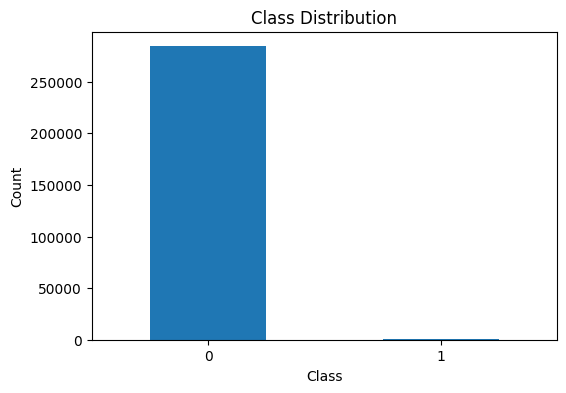

In [13]:
counts = data['Class'].value_counts()

plt.figure(figsize=(6,4))
counts.plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [14]:
data.duplicated().sum()

np.int64(1081)

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.duplicated().sum()

np.int64(0)

In [17]:
X = data.drop(columns=['Class'])
y = data[['Class']]

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.8,stratify=y,random_state=42)

## Normal DATA

In [10]:
from xgboost import XGBClassifier

In [11]:
xgb_model = XGBClassifier(scale_pos_weight=14, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)
print("XGB results : \n")
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")

f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

XGB results : 

accuracy_score is : 0.9994889507630493 
precision_score is : 0.9342105263157895
recall_score is : 0.7473684210526316
f1_score is : 0.8304093567251462
best threshold for max f1_score : 

best Threshold: 0.8428622
Precision (custom threshold): 0.9726027397260274
Recall (custom threshold): 0.7473684210526316
F1-score (custom threshold): 0.8452380952380952
best threshold for max recall : 

best Threshold: 0.11146474
Precision (custom threshold): 0.9012345679012346
Recall (custom threshold): 0.7684210526315789
F1-score (custom threshold): 0.8295454545454546


In [12]:
random_forest = RandomForestClassifier(n_estimators = 200 , random_state = 42 , n_jobs = -1)
random_forest.fit(X_train , y_train)
y_pred = random_forest.predict(X_test)
y_proba = random_forest.predict_proba(X_test)
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")
print(f"The ROC score is : {roc_auc_score(y_test , y_proba[:,1])}")

print("*" * 30)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")


f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")



accuracy_score is : 0.9995065731505305 
precision_score is : 0.971830985915493
recall_score is : 0.7263157894736842
f1_score is : 0.8313253012048193
The ROC score is : 0.928361556306434
******************************
best threshold for max f1_score : 

best Threshold: 0.49
Precision (custom threshold): 0.9726027397260274
Recall (custom threshold): 0.7473684210526316
F1-score (custom threshold): 0.8452380952380952
best threshold for max recall : 

best Threshold: 0.27
Precision (custom threshold): 0.9012345679012346
Recall (custom threshold): 0.7684210526315789
F1-score (custom threshold): 0.8295454545454546


## Random UnderSampeling

In [13]:
undersample = RandomUnderSampler(random_state=42)
X_train_res,y_train_res = undersample.fit_resample(X_train,y_train)

In [14]:
y_train['Class'].value_counts(),y_train_res['Class'].value_counts()

(Class
 0    226602
 1       378
 Name: count, dtype: int64,
 Class
 0    378
 1    378
 Name: count, dtype: int64)

In [15]:
xgb_model = XGBClassifier(scale_pos_weight=14, random_state=42)
xgb_model.fit(X_train_res, y_train_res)
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)
print("XGB results : \n")
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")

f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

XGB results : 

accuracy_score is : 0.9476262644063017 
precision_score is : 0.027275714755175814
recall_score is : 0.8736842105263158
f1_score is : 0.05289993626513703
best threshold for max f1_score : 

best Threshold: 0.99986506
Precision (custom threshold): 0.8202247191011236
Recall (custom threshold): 0.7684210526315789
F1-score (custom threshold): 0.7934782608695652
best threshold for max recall : 

best Threshold: 0.99999094
Precision (custom threshold): 0.9230769230769231
Recall (custom threshold): 0.12631578947368421
F1-score (custom threshold): 0.2222222222222222


In [16]:
random_forest = RandomForestClassifier(n_estimators = 200 , random_state = 42 , n_jobs = -1)
random_forest.fit(X_train , y_train)
y_pred = random_forest.predict(X_test)
y_proba = random_forest.predict_proba(X_test)
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")
print(f"The ROC score is : {roc_auc_score(y_test , y_proba[:,1])}")

print("*" * 30)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")


f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

accuracy_score is : 0.9995065731505305 
precision_score is : 0.971830985915493
recall_score is : 0.7263157894736842
f1_score is : 0.8313253012048193
The ROC score is : 0.928361556306434
******************************
best threshold for max f1_score : 

best Threshold: 0.49
Precision (custom threshold): 0.9726027397260274
Recall (custom threshold): 0.7473684210526316
F1-score (custom threshold): 0.8452380952380952
best threshold for max recall : 

best Threshold: 0.27
Precision (custom threshold): 0.9012345679012346
Recall (custom threshold): 0.7684210526315789
F1-score (custom threshold): 0.8295454545454546


## NearMiss

In [17]:
from imblearn.under_sampling import NearMiss

In [18]:
nm = NearMiss(version=1)
X_train_miss_1, y_train_miss_1 = nm.fit_resample(X_train, y_train)

In [19]:
nm = NearMiss(version=2)
X_train_miss_2, y_train_miss_2 = nm.fit_resample(X_train, y_train)

In [20]:
nm = NearMiss(version=3)
X_train_miss_3, y_train_miss_3 = nm.fit_resample(X_train, y_train)

In [21]:
def nearMiss(model,X_train,y_train):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
    print(f"precision_score is : {precision_score(y_test, y_pred)}")
    print(f"recall_score is : {recall_score(y_test, y_pred)}")
    print(f"f1_score is : {f1_score(y_test, y_pred)}")

    precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

    print("best threshold for max f1_score : \n")

    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

    best_threshold = thresholds[f1_scores.argmax()]
    print("best Threshold:", best_threshold)
    y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
    print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
    print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
    print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

    print("best threshold for max recall : \n")
    min_precision = .8
    valid_idx = np.where(precisions[:-1] >= min_precision)[0]
    best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

    print("best Threshold:", best_threshold)
    y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
    print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
    print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
    print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

In [22]:
models = [
        XGBClassifier(scale_pos_weight=14, random_state=42),
        RandomForestClassifier(n_estimators = 200 , random_state = 42 , n_jobs = -1)
]

In [23]:
X_trains = [X_train_miss_1,X_train_miss_2,X_train_miss_3]
y_trains = [y_train_miss_1,y_train_miss_2,y_train_miss_3]

In [ ]:
for model in models:
    for x,y in zip(X_trains,y_trains):
        nearMiss(model,x,y)
        

Model: XGBClassifier
accuracy_score is : 0.551052056532619 
precision_score is : 0.003520989006689879
recall_score is : 0.9473684210526315
f1_score is : 0.007015902712815715
best threshold for max f1_score : 

best Threshold: 0.9999447
Precision (custom threshold): 0.711340206185567
Recall (custom threshold): 0.7263157894736842
F1-score (custom threshold): 0.71875
best threshold for max recall : 

best Threshold: 0.9999716
Precision (custom threshold): 0.8
Recall (custom threshold): 0.631578947368421
F1-score (custom threshold): 0.7058823529411765
Model: XGBClassifier
accuracy_score is : 0.008194410178691009 
precision_score is : 0.0016851142330069533
recall_score is : 1.0
f1_score is : 0.0033645588000920826
best threshold for max f1_score : 

best Threshold: 0.9999577
Precision (custom threshold): 0.8904109589041096
Recall (custom threshold): 0.6842105263157895
F1-score (custom threshold): 0.7738095238095238
best threshold for max recall : 

best Threshold: 0.9999522
Precision (custom

not good

## TomekLinks


In [25]:
from imblearn.under_sampling import TomekLinks

In [26]:
tl = TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)

In [27]:
y_train_tl.value_counts()

Class
0        226542
1           378
Name: count, dtype: int64

In [28]:
xgb_model = XGBClassifier(scale_pos_weight=14, random_state=42)
xgb_model.fit(X_train_tl, y_train_tl)
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)
print("XGB results : \n")
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")

f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

XGB results : 

accuracy_score is : 0.9995241955380115 
precision_score is : 0.9358974358974359
recall_score is : 0.7684210526315789
f1_score is : 0.8439306358381503
best threshold for max f1_score : 

best Threshold: 0.51631576
Precision (custom threshold): 0.948051948051948
Recall (custom threshold): 0.7684210526315789
F1-score (custom threshold): 0.8488372093023255
best threshold for max recall : 

best Threshold: 0.2539553
Precision (custom threshold): 0.9024390243902439
Recall (custom threshold): 0.7789473684210526
F1-score (custom threshold): 0.8361581920903954


In [29]:
random_forest = RandomForestClassifier(n_estimators = 200 , random_state = 42 , n_jobs = -1)
random_forest.fit(X_train_tl , y_train_tl)
y_pred = random_forest.predict(X_test)
y_proba = random_forest.predict_proba(X_test)
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")
print(f"The ROC score is : {roc_auc_score(y_test , y_proba[:,1])}")

print("*" * 30)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")


f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

accuracy_score is : 0.9995418179254926 
precision_score is : 0.9726027397260274
recall_score is : 0.7473684210526316
f1_score is : 0.8452380952380952
The ROC score is : 0.9392004972272521
******************************
best threshold for max f1_score : 

best Threshold: 0.52
Precision (custom threshold): 0.9726027397260274
Recall (custom threshold): 0.7473684210526316
F1-score (custom threshold): 0.8452380952380952
best threshold for max recall : 

best Threshold: 0.335
Precision (custom threshold): 0.9102564102564102
Recall (custom threshold): 0.7473684210526316
F1-score (custom threshold): 0.8208092485549133


## EditedNearestNeighbours

In [30]:
from imblearn.under_sampling import EditedNearestNeighbours

In [31]:
EditedNearestNeighbours = EditedNearestNeighbours()
X_train_edN, y_train_edN = EditedNearestNeighbours.fit_resample(X_train, y_train)

In [32]:
xgb_model = XGBClassifier(scale_pos_weight=14, random_state=42)
xgb_model.fit(X_train_edN, y_train_edN)
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)
print("XGB results : \n")
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")

f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

XGB results : 

accuracy_score is : 0.9994713283755683 
precision_score is : 0.922077922077922
recall_score is : 0.7473684210526316
f1_score is : 0.8255813953488372
best threshold for max f1_score : 

best Threshold: 0.9651973
Precision (custom threshold): 0.9859154929577465
Recall (custom threshold): 0.7368421052631579
F1-score (custom threshold): 0.8433734939759037
best threshold for max recall : 

best Threshold: 0.21197009
Precision (custom threshold): 0.9012345679012346
Recall (custom threshold): 0.7684210526315789
F1-score (custom threshold): 0.8295454545454546


In [33]:
random_forest = RandomForestClassifier(n_estimators = 200 , random_state = 42 , n_jobs = -1)
random_forest.fit(X_train_edN , y_train_edN)
y_pred = random_forest.predict(X_test)
y_proba = random_forest.predict_proba(X_test)
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")
print(f"The ROC score is : {roc_auc_score(y_test , y_proba[:,1])}")

print("*" * 30)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")


f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

accuracy_score is : 0.9995594403129736 
precision_score is : 0.9861111111111112
recall_score is : 0.7473684210526316
f1_score is : 0.8502994011976048
The ROC score is : 0.9442722709405418
******************************
best threshold for max f1_score : 

best Threshold: 0.54
Precision (custom threshold): 0.9861111111111112
Recall (custom threshold): 0.7473684210526316
F1-score (custom threshold): 0.8502994011976048
best threshold for max recall : 

best Threshold: 0.335
Precision (custom threshold): 0.9
Recall (custom threshold): 0.7578947368421053
F1-score (custom threshold): 0.8228571428571428


In [ ]:
from imblearn.combine import SMOTETomek
from collections import Counter
'''
print("before :", Counter(y_train))

smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_resample(X_train, y_train)

print("after :", Counter(y_res))'''

قبل: Counter({'Class': 1})
بعد: Counter({'Class': 1})


In [37]:
y_res.value_counts(),y_train.value_counts()

(Class
 0        225955
 1        225955
 Name: count, dtype: int64,
 Class
 0        226602
 1           378
 Name: count, dtype: int64)

In [46]:
smote_tomek = SMOTETomek(sampling_strategy=0.25,random_state=42)
X_sm_tomek_25, y_sm_tomek_25 = smote_tomek.fit_resample(X_train, y_train)

In [51]:
xgb_model = XGBClassifier(scale_pos_weight=14, random_state=42)
xgb_model.fit(X_sm_tomek_25, y_sm_tomek_25)
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)
print("XGB results : \n")
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")

f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

XGB results : 

accuracy_score is : 0.9993479716632009 
precision_score is : 0.8085106382978723
recall_score is : 0.8
f1_score is : 0.8042328042328042
best threshold for max f1_score : 

best Threshold: 0.97334576
Precision (custom threshold): 0.9382716049382716
Recall (custom threshold): 0.8
F1-score (custom threshold): 0.8636363636363636
best threshold for max recall : 

best Threshold: 0.89351237
Precision (custom threshold): 0.9047619047619048
Recall (custom threshold): 0.8
F1-score (custom threshold): 0.8491620111731844


## SMOTETomek

In [30]:
from imblearn.combine import SMOTETomek

In [31]:
smote_tomek = SMOTETomek(sampling_strategy=0.1,random_state=42)
X_sm_tomek, y_sm_tomek = smote_tomek.fit_resample(X_train, y_train)

In [39]:
y_sm_tomek.value_counts(),y_train.value_counts()

(Class
 0        225589
 1         21647
 Name: count, dtype: int64,
 Class
 0        226602
 1           378
 Name: count, dtype: int64)

In [ ]:
xgb_model = XGBClassifier(scale_pos_weight=14, random_state=42)
xgb_model.fit(X_sm_tomek, y_sm_tomek)
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)
print("XGB results : \n")
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")

f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

XGB results : 

accuracy_score is : 0.9994537059880872 
precision_score is : 0.8636363636363636
recall_score is : 0.8
f1_score is : 0.8306010928961749
best threshold for max f1_score : 

best Threshold: 0.9573521
Precision (custom threshold): 0.9620253164556962
Recall (custom threshold): 0.8
F1-score (custom threshold): 0.8735632183908046
best threshold for max recall : 

best Threshold: 0.7340847
Precision (custom threshold): 0.9047619047619048
Recall (custom threshold): 0.8
F1-score (custom threshold): 0.8491620111731844


best results till now : 
1. about .87 f1-score (good)
2. we care about recall (less FN) as we don't want to miss any fraud
3. precision is great also (.96)

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_sm_tomek, y_sm_tomek)
y_pred = random_forest_model.predict(X_test)
y_proba = random_forest_model.predict_proba(X_test)
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")

f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

XGB results : 

accuracy_score is : 0.9995065731505305 
precision_score is : 0.9135802469135802
recall_score is : 0.7789473684210526
f1_score is : 0.8409090909090909
best threshold for max f1_score : 

best Threshold: 0.57
Precision (custom threshold): 0.9135802469135802
Recall (custom threshold): 0.7789473684210526
F1-score (custom threshold): 0.8409090909090909
best threshold for max recall : 

best Threshold: 0.44
Precision (custom threshold): 0.9024390243902439
Recall (custom threshold): 0.7789473684210526
F1-score (custom threshold): 0.8361581920903954


In [144]:
y_array = np.array(y_train).ravel().astype(int)
neg, pos = np.bincount(y_array)
scale = neg / pos
xgb_model = XGBClassifier(scale_pos_weight=scale, random_state=42)
xgb_model.fit(X_sm_tomek, y_sm_tomek)
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)
print("XGB results : \n")
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")

f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

XGB results : 

accuracy_score is : 0.9992246149508336 
precision_score is : 0.7524752475247525
recall_score is : 0.8
f1_score is : 0.7755102040816326
best threshold for max f1_score : 

best Threshold: 0.9773358
Precision (custom threshold): 0.9156626506024096
Recall (custom threshold): 0.8
F1-score (custom threshold): 0.8539325842696629
best threshold for max recall : 

best Threshold: 0.9702259
Precision (custom threshold): 0.9047619047619048
Recall (custom threshold): 0.8
F1-score (custom threshold): 0.8491620111731844


In [19]:
train_df = pd.concat([X_train,y_train],axis=1)

In [20]:
positive_class = train_df[train_df['Class'] == 1]
negative_class = train_df[train_df['Class'] == 0].sample(n=50000, random_state=42)

new_data = pd.concat([positive_class, negative_class], axis=0)
new_data = new_data.sample(frac=1, random_state=42).reset_index(drop=True)

X_train_new = new_data.drop(columns=['Class'])
y_train_new = new_data['Class']



In [24]:
y_train_new.value_counts()

Class
0    50000
1      378
Name: count, dtype: int64

In [33]:
random_forest_new = RandomForestClassifier(n_estimators=200 , max_depth=30,random_state=42)
random_forest_new.fit(X_train_new, y_train_new)
y_pred = random_forest_new.predict(X_test)
y_proba = random_forest_new.predict_proba(X_test)
print(f"accuracy_score is : {accuracy_score(y_test , y_pred)} ")
print(f"precision_score is : {precision_score(y_test , y_pred)}")
print(f"recall_score is : {recall_score(y_test , y_pred)}")
print(f"f1_score is : {f1_score(y_test , y_pred)}")

print("*" * 30)

precision , recall , thresholds = precision_recall_curve(y_test , y_proba[:,1])
f1_score_calulated = 2 * (precision * recall) / (precision + recall +1e-10)
index_ofmax_thershold = np.argmax(f1_score_calulated)
thershold_max = thresholds[index_ofmax_thershold]
y_pred_custom = (y_proba[:, 1] >= thershold_max).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test , y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test , y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test , y_pred_custom)}")

accuracy_score is : 0.9994360836006062 
precision_score is : 0.8888888888888888
recall_score is : 0.7578947368421053
f1_score is : 0.8181818181818182
******************************
Precision (custom threshold): 0.958904109589041
Recall (custom threshold): 0.7368421052631579
F1-score (custom threshold): 0.8333333333333334


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 1) SMOTE
smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_sm, y_sm = smote.fit_resample(X_train, y_train)
rf.fit(X_sm, y_sm)
y_pred = rf.predict(X_test)
print("==== SMOTE ====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

# 2) SMOTETomek
smote_tomek = SMOTETomek(sampling_strategy=0.1, random_state=42)
X_smt, y_smt = smote_tomek.fit_resample(X_train, y_train)
rf.fit(X_smt, y_smt)
y_pred = rf.predict(X_test)
print("\n==== SMOTETomek ====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

# 3) SMOTEENN
smote_enn = SMOTEENN(sampling_strategy=0.1, random_state=42)
X_sme, y_sme = smote_enn.fit_resample(X_train, y_train)
rf.fit(X_sme, y_sme)
y_pred = rf.predict(X_test)
print("\n==== SMOTEENN ====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

==== SMOTE ====
Accuracy: 0.9995065731505305
Precision: 0.9135802469135802
Recall: 0.7789473684210526
F1: 0.8409090909090909

==== SMOTETomek ====
Accuracy: 0.9995065731505305
Precision: 0.9135802469135802
Recall: 0.7789473684210526
F1: 0.8409090909090909

==== SMOTEENN ====
Accuracy: 0.9994713283755683
Precision: 0.9012345679012346
Recall: 0.7684210526315789
F1: 0.8295454545454546


In [132]:
# 3) SMOTEENN
smote_enn = SMOTEENN(sampling_strategy=0.1, random_state=42)
X_smenn, y_smenn = smote_enn.fit_resample(X_train, y_train)

In [133]:
xgb_model = XGBClassifier(scale_pos_weight=14, random_state=42)
xgb_model.fit(X_smenn, y_smenn)
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)
print("XGB results : \n")
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")

f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .8
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

XGB results : 

accuracy_score is : 0.9995418179254926 
precision_score is : 0.9156626506024096
recall_score is : 0.8
f1_score is : 0.8539325842696629
best threshold for max f1_score : 

best Threshold: 0.93898463
Precision (custom threshold): 0.9736842105263158
Recall (custom threshold): 0.7789473684210526
F1-score (custom threshold): 0.8654970760233918
best threshold for max recall : 

best Threshold: 0.096558236
Precision (custom threshold): 0.8
Recall (custom threshold): 0.8
F1-score (custom threshold): 0.8


In [134]:
random_forest = RandomForestClassifier(n_estimators = 200 , random_state = 42 , n_jobs = -1)
random_forest.fit(X_smenn , y_smenn)
y_pred = random_forest.predict(X_test)
y_proba = random_forest.predict_proba(X_test)
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")
print(f"The ROC score is : {roc_auc_score(y_test , y_proba[:,1])}")

print("*" * 30)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")


f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

accuracy_score is : 0.9994713283755683 
precision_score is : 0.9012345679012346
recall_score is : 0.7684210526315789
f1_score is : 0.8295454545454546
The ROC score is : 0.9564948451692682
******************************
best threshold for max f1_score : 

best Threshold: 0.61
Precision (custom threshold): 0.9240506329113924
Recall (custom threshold): 0.7684210526315789
F1-score (custom threshold): 0.8390804597701149
best threshold for max recall : 

best Threshold: 0.565
Precision (custom threshold): 0.9012345679012346
Recall (custom threshold): 0.7684210526315789
F1-score (custom threshold): 0.8295454545454546


In [147]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
import numpy as np

model_extra = ExtraTreesClassifier(n_estimators = 500 , class_weight = 'balanced' , random_state = 42)
model_extra.fit(X_train , y_train)

y_pred = model_extra.predict(X_test)
y_proba = model_extra.predict_proba(X_test)

print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")
print(f"The ROC score is : {roc_auc_score(y_test , y_proba[:,1])}")

print("*" * 30)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")


f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

accuracy_score is : 0.9995065731505305 
precision_score is : 0.9855072463768116
recall_score is : 0.7157894736842105
f1_score is : 0.8292682926829268
The ROC score is : 0.9576765031322901
******************************
best threshold for max f1_score : 

best Threshold: 0.288
Precision (custom threshold): 0.961038961038961
Recall (custom threshold): 0.7789473684210526
F1-score (custom threshold): 0.8604651162790697
best threshold for max recall : 

best Threshold: 0.196
Precision (custom threshold): 0.9024390243902439
Recall (custom threshold): 0.7789473684210526
F1-score (custom threshold): 0.8361581920903954


In [148]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
import numpy as np

model_extra = ExtraTreesClassifier(n_estimators = 500 , class_weight = 'balanced' , random_state = 42)
model_extra.fit(X_sm_tomek , y_sm_tomek)

y_pred = model_extra.predict(X_test)
y_proba = model_extra.predict_proba(X_test)

print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")
print(f"The ROC score is : {roc_auc_score(y_test , y_proba[:,1])}")

print("*" * 30)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")


f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

accuracy_score is : 0.9995418179254926 
precision_score is : 0.9367088607594937
recall_score is : 0.7789473684210526
f1_score is : 0.8505747126436781
The ROC score is : 0.9690173165522232
******************************
best threshold for max f1_score : 

best Threshold: 0.618
Precision (custom threshold): 0.961038961038961
Recall (custom threshold): 0.7789473684210526
F1-score (custom threshold): 0.8604651162790697
best threshold for max recall : 

best Threshold: 0.366
Precision (custom threshold): 0.9036144578313253
Recall (custom threshold): 0.7894736842105263
F1-score (custom threshold): 0.8426966292134831


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_sm_tomek))
X_test_std = pd.DataFrame(scaler.transform(X_test))

In [159]:
random_forest = RandomForestClassifier(n_estimators = 200 , random_state = 42 , n_jobs = -1)
random_forest.fit(X_train_std, y_sm_tomek)
y_pred = random_forest.predict(X_test_std)
y_proba = random_forest.predict_proba(X_test_std)
print("XGB results : \n")
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")

f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .8
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

XGB results : 

accuracy_score is : 0.9995065731505305 
precision_score is : 0.9135802469135802
recall_score is : 0.7789473684210526
f1_score is : 0.8409090909090909
best threshold for max f1_score : 

best Threshold: 0.56
Precision (custom threshold): 0.9135802469135802
Recall (custom threshold): 0.7789473684210526
F1-score (custom threshold): 0.8409090909090909
best threshold for max recall : 

best Threshold: 0.255
Precision (custom threshold): 0.8020833333333334
Recall (custom threshold): 0.8105263157894737
F1-score (custom threshold): 0.806282722513089


# BEST RESULTS OF UNDERSAMPLING:

### XGB results : 

- accuracy_score is : 0.9994537059880872 
- precision_score is : 0.8636363636363636
- recall_score is : 0.8
- f1_score is : 0.8306010928961749

### best threshold for max f1_score : 

- best Threshold: 0.9573521
- Precision (custom threshold): 0.9620253164556962
- Recall (custom threshold): 0.8
- F1-score (custom threshold): 0.8735632183908046

### best threshold for max recall : 

- best Threshold: 0.7340847
- Precision (custom threshold): 0.9047619047619048
- Recall (custom threshold): 0.8
- F1-score (custom threshold): 0.8491620111731844